In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

In [3]:
# Reading the csv file of dataset
df = pd.read_csv('./../data/fake_job_postings.csv')
# Display the first 5 examples of the dataset
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
# Show total columns of data set
df.columns

# Select desired features
df = df[['title', 'location','company_profile', 'description', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function','fraudulent']]

In [6]:
# Check for null values
df.isna().apply(pd.value_counts)

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880.0,17534,14572,17879,15185,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0
True,NaN,346,3308,1,2695,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN


In [7]:
# Check for number of null values
df.isnull().sum()

title                     0
location                346
company_profile        3308
description               1
requirements           2695
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [8]:
#Check if any duplicate rows in dataset
df.duplicated().sum()

302

In [9]:
#drop the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
#Differentiate categorical data and numerical data
dfNum = df[['telecommuting','has_company_logo','has_questions','fraudulent']]
dfCat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

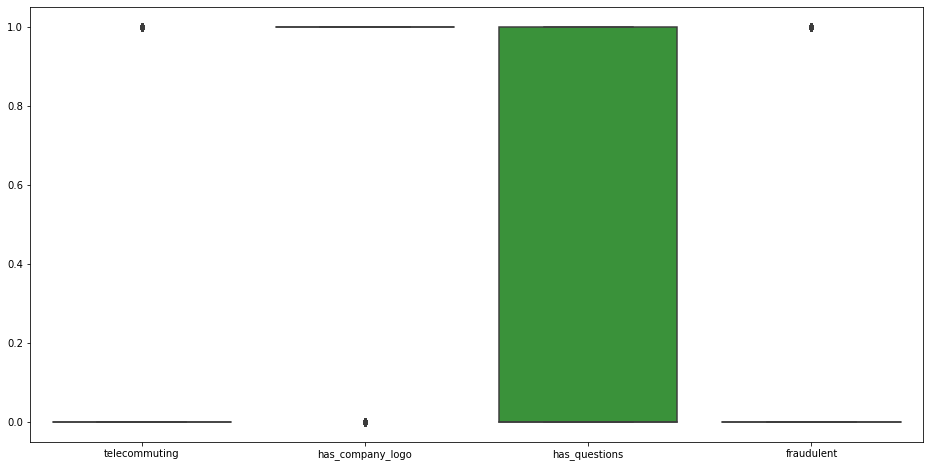

In [11]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sb.boxplot(data = dfNum)
plt.show()

In [12]:
#Removing Outliers from columns
dfNum = dfNum[dfNum['telecommuting'] < 0.9 ]
dfNum = dfNum[dfNum['fraudulent'] < 0.9 ]
dfNum = dfNum[dfNum['has_company_logo'] > 0.1 ]
dfNum

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0
...,...,...,...,...
17872,0,1,0,0
17873,0,1,0,0
17875,0,1,1,0
17876,0,1,1,0


In [13]:
df.isnull().sum()

title                     0
location                341
company_profile        3281
description               1
requirements           2646
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3426
required_experience    6960
required_education     8007
industry               4835
function               6360
fraudulent                0
dtype: int64

In [14]:
df.dropna(axis= 0, how= 'any', inplace=True)
df.isnull().sum()

title                  0
location               0
company_profile        0
description            0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [15]:
df.shape

(6013, 14)

In [16]:
# Balancing data set
df['fraudulent'].value_counts()

0    5820
1     193
Name: fraudulent, dtype: int64

In [17]:
# As we can see from above steps, our data set is inbalanced so we need to balance it before train our model
fraud = df[df['fraudulent']== 1]

not_fraud = df[df['fraudulent']== 0]
fraud.shape, not_fraud.shape

((193, 14), (5820, 14))

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

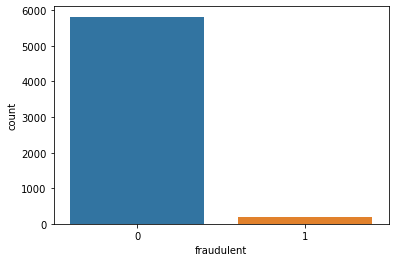

In [18]:
sns.countplot(x = "fraudulent" , data = df)

In [19]:
# we can oversample 'fraud' dataframe in order to get balanced dataset.
fraud = fraud.sample(5820, replace=True)

In [20]:
fraud.shape, not_fraud.shape

((5820, 14), (5820, 14))

In [21]:
df = fraud.append(not_fraud)
df.reset_index()

,index,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,11756,UST Testing Technician III,"US, CA, Bakersfield, CA",...,"UST Testing Technician IIIBakersfield, CALocal...",Responsibilities &amp; Position Requirements:T...,0,1,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1
1,7748,Accountant,"US, CA, San Mateo",Bright Edge and Aptitude Staffing Solutions ha...,We are an innovative and fast growing internet...,Requirements BA degree in accounting or financ...,0,1,1,Full-time,Associate,Bachelor's Degree,Accounting,Accounting/Auditing,1
2,11754,UST Testing Technician,"US, CA, Bakersfield, CA",...,"UST Testing Technician | Bakersfield, CALoc...","Qualifications:Availability to work overtime, ...",0,1,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1
3,5744,"Account Sales Managers $80-$130,000/yr","US, NY, Long Island",We have aggressive growth plans in place for t...,We provide No Credit Check Financing to custom...,Experience and Skills Required- Minimum of 3 ...,0,1,0,Full-time,Associate,High School or equivalent,Financial Services,Business Development,1
4,2433,Director of Technical Operations,"US, NY, NY",Aptitude Staffing Solutions has redesigned the...,Director of Software Engineering's newly formi...,Requirements: At least 10+ years in software ...,0,1,1,Full-time,Director,Master's Degree,Marketing and Advertising,Engineering,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,17861,Junior Embedded Engineer,"GR, A, Komotini","Tribe Wearables is a venture-backed startup, d...",WHO WE ARETribe Wearables is a venture-backed ...,Skills we are looking for:BSc degree in Comput...,0,1,0,Full-time,Entry level,Bachelor's Degree,Computer Hardware,Engineering,0
11636,17862,Clinical Supervisor,"US, SC, GREENVILLE",Crossroads Treatment Centers is a nationally-a...,Crossroads Treatment Centers in South Carolina...,Four-year degree in counseling or related fiel...,0,1,1,Full-time,Associate,Bachelor's Degree,Medical Practice,Health Care Provider,0
11637,17865,Portfolio Development Associate - Paris & rest...,"GB, LND, London",We're hiring!AvenueStory is a concept driven b...,"AvenueStory is looking for a curious, ambitiou...","Comfortable on the phone, fluent in French and...",0,1,1,Full-time,Entry level,Bachelor's Degree,Real Estate,Sales,0
11638,17870,Senior Financial Analyst (Retail),"US, CA, Gardena",PROSULTING IS PEOPLE The ProSulting difference...,We are activity searching for a Senior Financi...,Must have a minimum of 3 + years in Financial ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Financial Analyst,0


In [22]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['description'] = le.fit_transform(df['description'])

df.head()

,index,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,11756,3861,565,1063,4023,3372,0,1,1,1,5,2,84,23,1
1,7748,148,660,179,4206,3365,0,1,1,1,0,1,0,0,1
2,11754,3859,565,1063,5230,2771,0,1,1,1,5,2,84,23,1
3,5744,144,1040,946,4747,1558,0,1,0,1,0,4,39,5,1
4,2433,1100,1043,105,1122,3316,0,1,1,1,1,5,71,12,1


In [24]:
from sklearn.model_selection import train_test_split

In [46]:
X = df[['title', 'location', 'company_profile', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'description']].values
Y = df[['fraudulent']].values


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [48]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8730, 13), (2910, 13), (8730, 1), (2910, 1))

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(n_estimators=5)

In [51]:
rfc.fit(X_train, Y_train)

C:\Users\huuth\AppData\Local\Temp\ipykernel_15976\1640918255.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=5)

In [52]:
# Test the model
Y_pred = rfc.predict(X_test)

In [53]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [54]:
print(Y_pred)

[1 0 1 ... 0 0 1]


In [55]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
2905,1,1
2906,0,0
2907,0,0
2908,0,0


In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(Y_pred,Y_test)

0.9996563573883162

In [58]:
import joblib

In [59]:
joblib.dump(rfc, 'model.pkl')

['model.pkl']